In [44]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder, OneHotEncoder
from keras.models import Sequential
from keras.layers import Dense
import matplotlib.pyplot as plt
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report, roc_auc_score, roc_curve
import seaborn as sns
from sklearn.metrics import classification_report, confusion_matrix, roc_auc_score, roc_curve
from sklearn.ensemble import GradientBoostingClassifier
from keras.callbacks import EarlyStopping
import tensorflow as tf
from tensorflow.keras.layers import Dense, Dropout
from tensorflow.keras.models import Sequential
from keras.optimizers import RMSprop
from keras.optimizers import SGD
from tensorflow.keras.layers import LeakyReLU
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import KFold
import h5py


In [45]:
# Load the dataset into a Pandas DataFrame
data = pd.read_csv('heart_failure.csv')

In [46]:
# Separate features and target
X = data.drop('DEATH_EVENT', axis=1)
y = data['DEATH_EVENT']

# Encode categorical variables
categorical_cols = ['anaemia', 'diabetes', 'high_blood_pressure', 'sex', 'smoking']
le = LabelEncoder()
for col in categorical_cols:
    X[col] = le.fit_transform(X[col])

# Scale numerical features
scaler = StandardScaler()
numerical_cols = ['age', 'creatinine_phosphokinase', 'ejection_fraction', 'platelets', 'serum_creatinine', 'serum_sodium', 'time']
X[numerical_cols] = scaler.fit_transform(X[numerical_cols])

#Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [74]:
model = Sequential()
model.add(Dense(units=64, kernel_initializer='uniform', activation='relu', input_dim=X_train.shape[1])) #initial layer
#model.add(Dense(units=128, kernel_initializer='uniform', activation='relu')) ## hidden layer 1
#model.add(Dense(units=64, kernel_initializer='uniform', activation='relu')) ## hidden layer 2
model.add(Dense(units=16, kernel_initializer='uniform', activation='relu')) ## hidden layer 3
#model.add(Dense(units=8, kernel_initializer='uniform', activation='relu')) ## hidden layer 4
#model.add(Dense(units=8, kernel_initializer='uniform', activation='relu')) ## hidden layer 5
model.add(Dropout(0.4))
model.add(Dense(units=1, kernel_initializer='uniform', activation='sigmoid'))  ## output layer
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])



# Train the model
#early_stop = EarlyStopping(monitor='val_loss', patience=10)
#model.fit(X_train, y_train, epochs=100, batch_size=32, validation_data=(X_test, y_test), callbacks=[early_stop],validation_split=0.20)


# Train the model
history = model.fit(X_train, y_train, batch_size=32, epochs=20, validation_split=0.2)

Epoch 1/20
6/6 [==============================] - 12s 74ms/step - loss: 0.6924 - accuracy: 0.6073 - val_loss: 0.6903 - val_accuracy: 0.7500
Epoch 2/20
6/6 [==============================] - 0s 14ms/step - loss: 0.6897 - accuracy: 0.6911 - val_loss: 0.6874 - val_accuracy: 0.7500
Epoch 3/20
6/6 [==============================] - 0s 13ms/step - loss: 0.6867 - accuracy: 0.6911 - val_loss: 0.6830 - val_accuracy: 0.7500
Epoch 4/20
6/6 [==============================] - 0s 14ms/step - loss: 0.6822 - accuracy: 0.6911 - val_loss: 0.6765 - val_accuracy: 0.7500
Epoch 5/20
6/6 [==============================] - 0s 13ms/step - loss: 0.6748 - accuracy: 0.6963 - val_loss: 0.6668 - val_accuracy: 0.7500
Epoch 6/20
6/6 [==============================] - 0s 11ms/step - loss: 0.6623 - accuracy: 0.7068 - val_loss: 0.6520 - val_accuracy: 0.7708
Epoch 7/20
6/6 [==============================] - 0s 16ms/step - loss: 0.6465 - accuracy: 0.7120 - val_loss: 0.6311 - val_accuracy: 0.7708
Epoch 8/20
6/6 [==========

In [75]:
## Evaluate the ANN Model

## After training, we'll evaluate the performance of the ANN model on the test data.

# Evaluate the model
scores = model.evaluate(X_test, y_test)
print('Accuracy:', scores[1])

2/2 [==============================] - 0s 30ms/step - loss: 0.5636 - accuracy: 0.7667
Accuracy: 0.7666666507720947


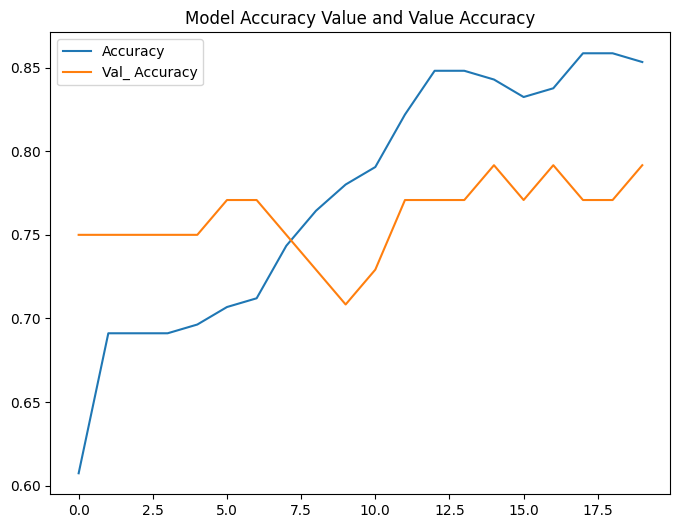

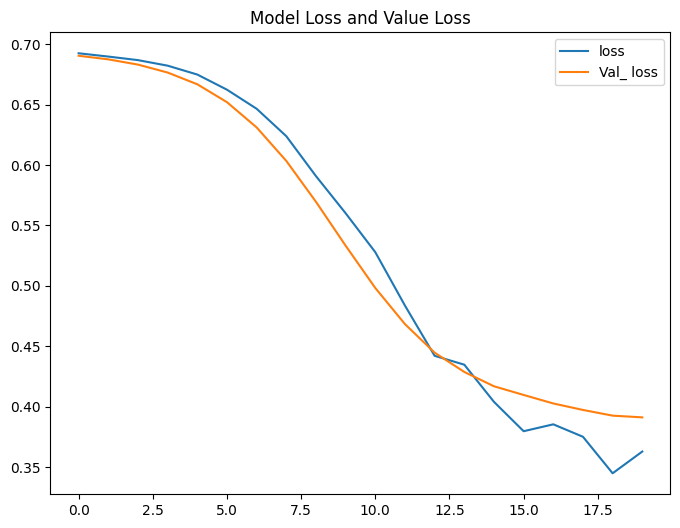

In [76]:
plt.figure(figsize=(8,6))
plt.plot(history.history['accuracy'], label = 'Accuracy')
plt.plot(history.history['val_accuracy'], label = 'Val_ Accuracy')
plt.title('Model Accuracy Value and Value Accuracy')
plt.legend()
plt.show()

plt.figure(figsize=(8,6))
plt.plot(history.history['loss'], label = 'loss')
plt.plot(history.history['val_loss'], label = 'Val_ loss')
plt.title('Model Loss and Value Loss')
plt.legend()
plt.show()

In [16]:
## save the network
model.save('version_4.h5')

c:\Users\kater\AppData\Local\Programs\Python\Python311\Lib\site-packages\keras\src\engine\training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


In [17]:
## load the file
version_model = tf.keras.models.load_model('version_4.h5')

In [18]:
## Make prediction
y_pred_ann = version_model.predict(X_test)
y_pred_ann

2/2 [==============================] - 2s 18ms/step


array([[0.42525643],
       [0.31499013],
       [0.38924447],
       [0.70905215],
       [0.37498873],
       [0.36269614],
       [0.5251626 ],
       [0.3245607 ],
       [0.6211852 ],
       [0.39544564],
       [0.42034656],
       [0.3794969 ],
       [0.38814732],
       [0.4392064 ],
       [0.40045652],
       [0.41362923],
       [0.39578426],
       [0.45615786],
       [0.38567144],
       [0.5188925 ],
       [0.4435219 ],
       [0.42443013],
       [0.47835642],
       [0.5103371 ],
       [0.44395283],
       [0.35122254],
       [0.38213792],
       [0.3461919 ],
       [0.39560428],
       [0.33594713],
       [0.5517954 ],
       [0.33196875],
       [0.46907365],
       [0.5854742 ],
       [0.4531239 ],
       [0.3873966 ],
       [0.40801442],
       [0.42007482],
       [0.43420768],
       [0.39517078],
       [0.45673764],
       [0.5735385 ],
       [0.34937024],
       [0.37365836],
       [0.43291518],
       [0.42949927],
       [0.40846708],
       [0.377

In [19]:
## set a threshold
y_pred_ann = np.where(y_pred_ann > 0.5, 1,0)
y_pred_ann

array([[0],
       [0],
       [0],
       [1],
       [0],
       [0],
       [1],
       [0],
       [1],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [1],
       [0],
       [0],
       [0],
       [1],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [1],
       [0],
       [0],
       [1],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [1],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [1],
       [0],
       [1]])

In [20]:
## Flatten the y pred
y_pred_ann = y_pred_ann.flatten()

In [21]:
## Classification report NN
print("Classification Report: Neural Network 2")
print(classification_report(y_test, y_pred_ann))

Classification Report: Neural Network 2
              precision    recall  f1-score   support

           0       0.70      1.00      0.82        35
           1       1.00      0.40      0.57        25

    accuracy                           0.75        60
   macro avg       0.85      0.70      0.70        60
weighted avg       0.82      0.75      0.72        60



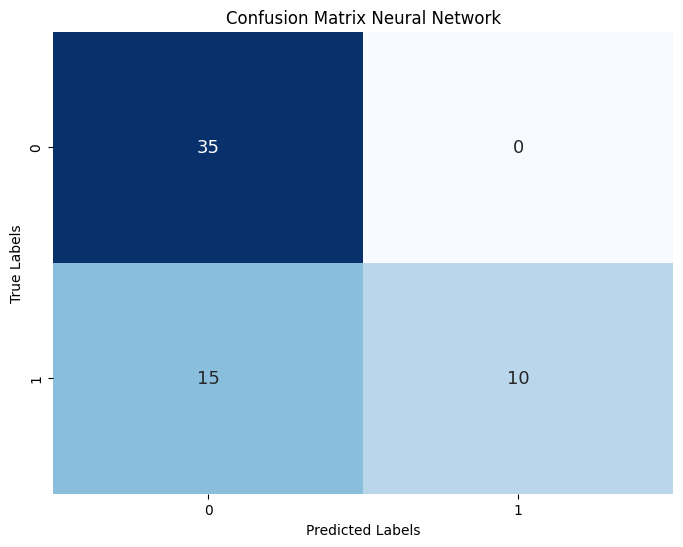

In [22]:
## confusion matrix
cm_nn = confusion_matrix(y_test, y_pred_ann)
#fig, ax = plot_confusion_matrix(cm, figsize=(4,4), cmap='Greens')
#plt.xlabel('Predictions', fontsize = 18)
#plt.ylabel('Actuals', fontsize = 18)
#plt.title('confusion matrix', fontsize = 18)
#plt.show()

## confusion matrix plot
# Step 2: Confusion Matrix Plot
plt.figure(figsize=(8, 6))
sns.heatmap(cm_nn, annot=True, cmap='Blues', fmt='g', cbar=False, annot_kws={"size": 13})
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title('Confusion Matrix Neural Network')
plt.show()

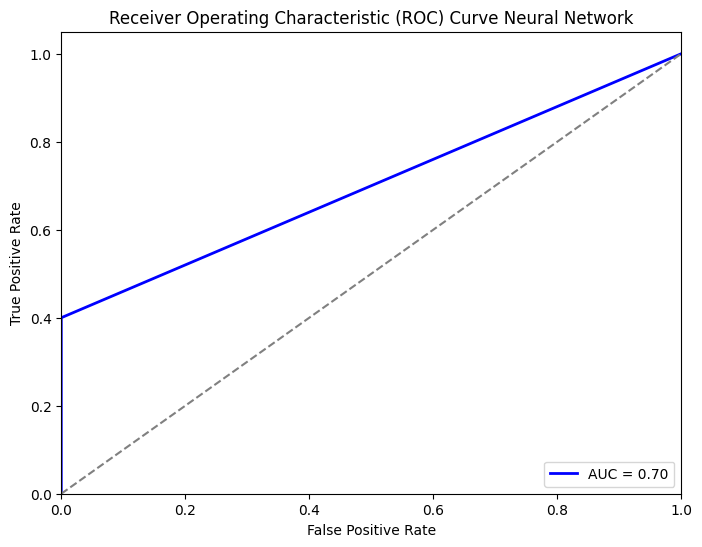

In [23]:
# Step 3: AUC-ROC Curve
auc = roc_auc_score(y_test, y_pred_ann)
fpr, tpr, thresholds = roc_curve(y_test, y_pred_ann)

plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='blue', lw=2, label=f'AUC = {auc:.2f}')
plt.plot([0, 1], [0, 1], color='gray', linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve Neural Network')
plt.legend(loc='lower right')
plt.show()

In [24]:
# Evaluate the model on the testing set
test_loss, test_acc = version_model.evaluate(X_test, y_test)
print(f'Test Loss: {test_loss:.4f}')
print(f'Test Accuracy: {test_acc:.4f}')

# Make predictions on new data
#new_data = ... # Load new data for prediction
#predictions = model.predict(new_data)

2/2 [==============================] - 1s 25ms/step - loss: 0.6052 - accuracy: 0.7500
Test Loss: 0.6052
Test Accuracy: 0.7500
